# EDA and Data Cleaning

---

## Distribution of SMILES and Spectrum for GC-MS Dataset

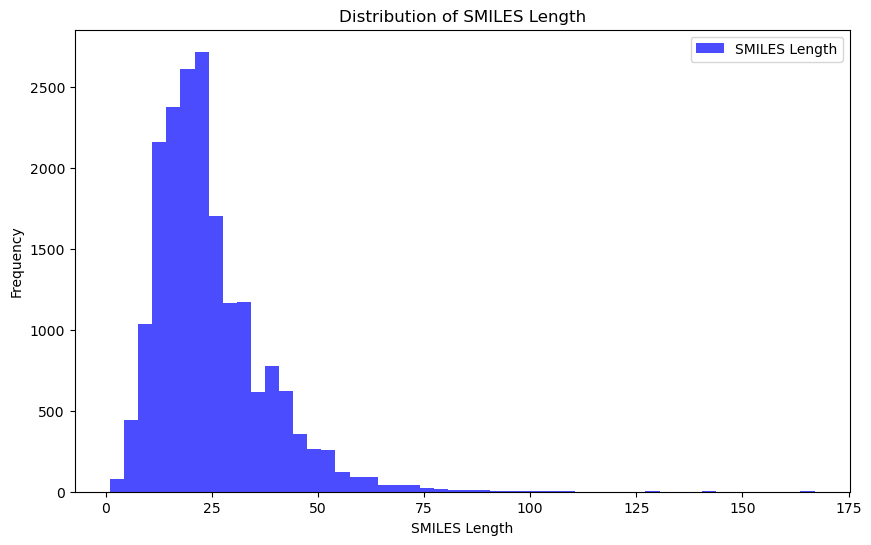

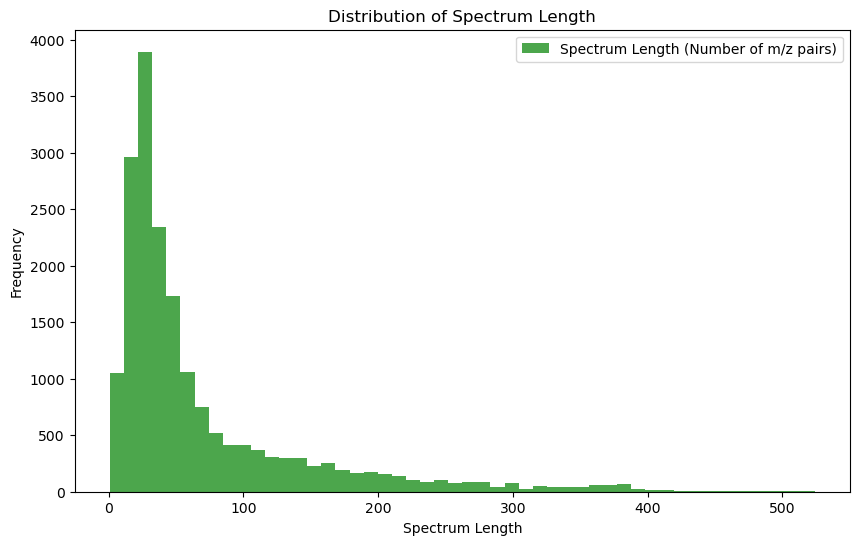

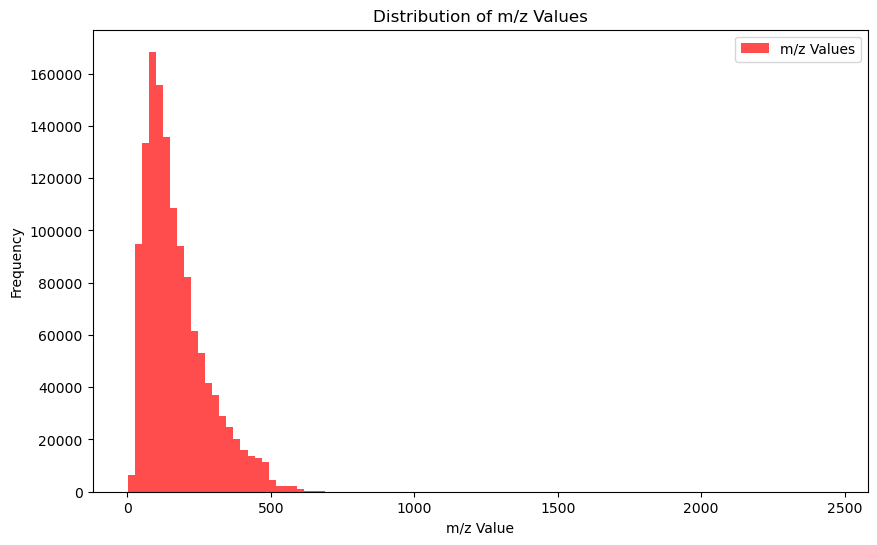

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load data
df = pd.read_csv('gc_spec.csv')
df = df.dropna(subset=['SMILES', 'Spectrum'])

df['smiles_length'] = df['SMILES'].apply(len)

# spectrum length
def parse_spectrum(spectrum_str):
    pairs = spectrum_str.split()
    return len(pairs)

df['spectrum_length'] = df['Spectrum'].apply(parse_spectrum)

# m/z distribution
def extract_mz_values(spectrum_str):
    pairs = spectrum_str.split()
    mz_values = [float(pair.split(':')[0]) for pair in pairs]  # some m/z are floats
    return mz_values

df['mz_values'] = df['Spectrum'].apply(extract_mz_values)
all_mz_values = [mz for sublist in df['mz_values'] for mz in sublist]

plt.figure(figsize=(10, 6))
plt.hist(df['smiles_length'], bins=50, color='blue', alpha=0.7, label='SMILES Length')
plt.xlabel('SMILES Length')
plt.ylabel('Frequency')
plt.title('Distribution of SMILES Length')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['spectrum_length'], bins=50, color='green', alpha=0.7, label='Spectrum Length (Number of m/z pairs)')
plt.xlabel('Spectrum Length')
plt.ylabel('Frequency')
plt.title('Distribution of Spectrum Length')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(all_mz_values, bins=100, color='red', alpha=0.7, label='m/z Values')
plt.xlabel('m/z Value')
plt.ylabel('Frequency')
plt.title('Distribution of m/z Values')
plt.legend()
plt.show()


## GC-MS SMILES Vocab EDA

/var/folders/s0/x54j95f115gc78p81vgdqks00000gn/T/ipykernel_5857/2913871462.py:5: DtypeWarning: Columns (6,13,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('consolidated_chem_data.csv')


unique characters and their counts:
' ': 2
'#': 2921
'%': 6292
'&': 8
'(': 1256695
')': 1256695
'*': 3
'+': 5933
',': 1
'-': 4432
'.': 2163
'/': 1115
'0': 2960
'1': 378036
'2': 291202
'3': 206585
'4': 125223
'5': 66688
'6': 34819
'7': 19196
'8': 11438
'9': 5556
';': 8
'=': 1094406
'@': 10579
'A': 38
'B': 1278
'C': 3963521
'F': 19906
'G': 10
'H': 10841
'I': 1075
'K': 7
'M': 12
'N': 285672
'O': 1296596
'P': 21738
'S': 26629
'V': 2
'Z': 5
'[': 24444
'\': 463
']': 24444
'a': 22255
'c': 65625
'd': 2
'e': 108
'g': 29
'i': 2705
'l': 16380
'n': 47707
'o': 1367
'r': 1241
's': 137
't': 9
'u': 5

Total Unique Characters (Vocabulary Size): 56


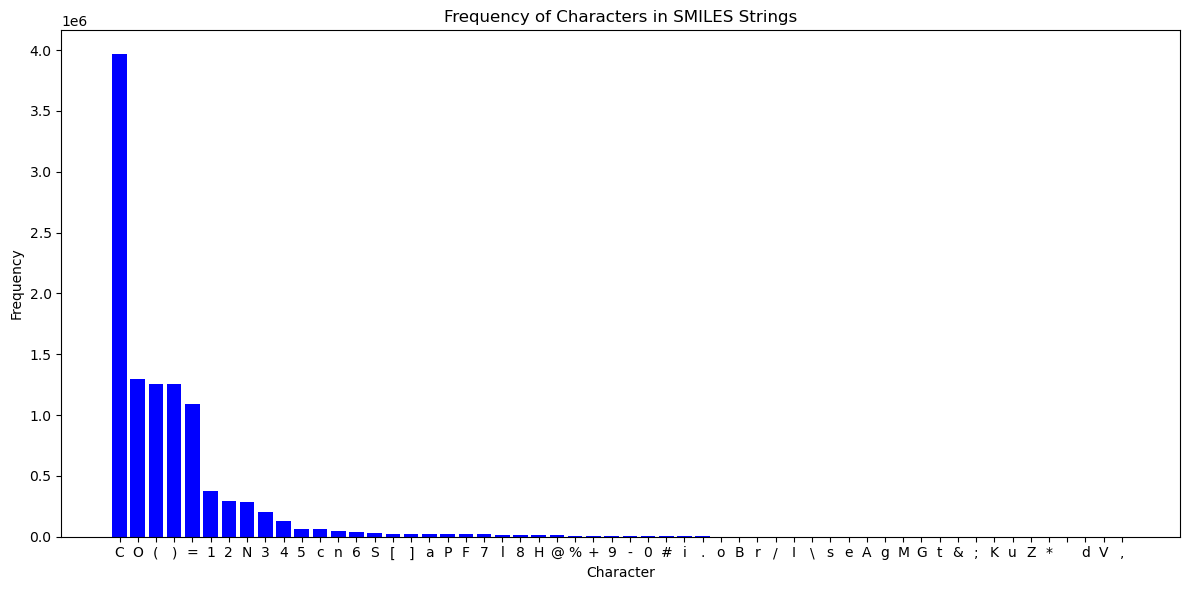

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

data = pd.read_csv('consolidated_chem_data.csv')

smiles_data = data['SMILES'].astype(str)

# combine all smile strings into one string
all_smiles = ''.join(smiles_data)

# frequency of each character
char_counts = Counter(all_smiles)

unique_chars = sorted(char_counts.keys())
unique_counts = [char_counts[char] for char in unique_chars]

print("unique characters and their counts:")
for char, count in zip(unique_chars, unique_counts):
    print(f"'{char}': {count}")

print(f"\nTotal Unique Characters (Vocabulary Size): {len(unique_chars)}")

chars, counts = zip(*sorted(char_counts.items(), key=lambda x: x[1], reverse=True))

# Plot the frequencies
plt.figure(figsize=(12, 6))
plt.bar(chars, counts, color='blue')
plt.title('Frequency of Characters in SMILES Strings')
plt.xlabel('Character')
plt.ylabel('Frequency')
plt.xticks()
plt.tight_layout()
plt.show()


# Data Cleaning

smiles.csv from a collection of MoleculeNet Datasets

In [3]:
df = pd.read_csv('smiles.csv')
df.shape

(706862, 1)

In [4]:
# selecting only SMILES under 75 characters
df = df[df['smiles'].apply(len) < 75]
df.shape

(662657, 1)

In [5]:
# save to csv
df.to_csv('smiles_filtered.csv', index=False)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv('smiles_filtered.csv')

smiles_data = df['smiles'].astype(str)

# allowed vocabulary
allowed_vocab = set(":#()+,-.1234567=@ABCDFGHINOPSZ[]acdegilnorst")

# filter
filtered_smiles = smiles_data[smiles_data.apply(lambda x: all(char in allowed_vocab for char in x))]

filtered_smiles.to_csv('filtered_smiles.csv', index=False)